In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
dados = pd.read_csv('df_total.csv')

variaveis_explicativas = ['radiacao_global', 'pressao_atmosferica_max',
                          'pressao_atmosferica_min', 'umidade_rel_ar',
                          'umidade_rel_max', 'umidade_rel_min']
variavel_resposta = 'precipitacao'

X = dados[variaveis_explicativas]
y = dados[variavel_resposta]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [ ]:
modelo_ridge = Ridge(alpha=0.001)

modelo_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.001)

In [ ]:
y_pred = modelo_ridge.predict(X_test_scaled)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

r2_ridge = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2_ridge:.2f}")


Erro Quadrático Médio (MSE): 928.30
Coeficiente de Determinação (R²): 0.32


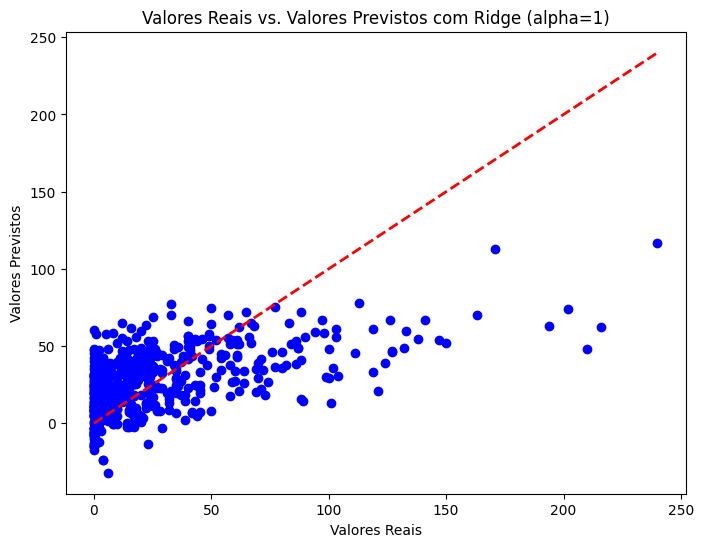

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=1, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos com Ridge (alpha=1)')
plt.show()

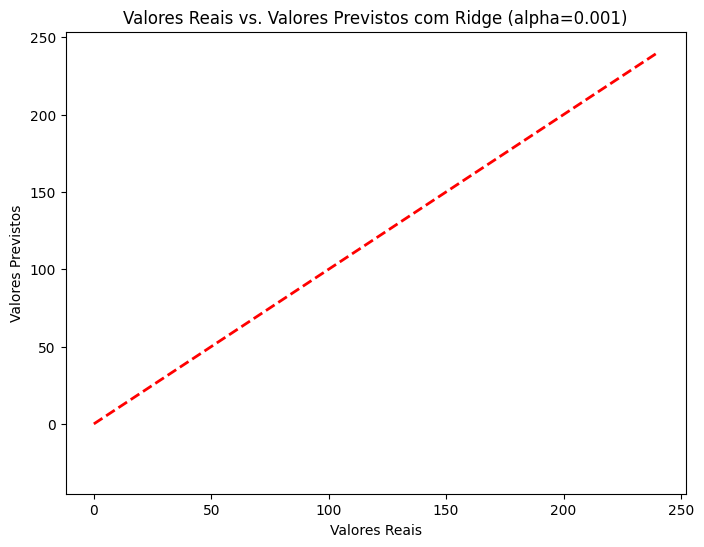

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.001, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos com Ridge (alpha=0.001)')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
parametros_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso(max_iter=10000)

grid_lasso = GridSearchCV(lasso, parametros_lasso, cv=5, scoring='r2', n_jobs=-1)

melhor_alpha_lasso = grid_lasso.best_params_['alpha']
print(f"Melhor alpha para Lasso: {melhor_alpha_lasso}")

modelo_lasso_final = Lasso(alpha=melhor_alpha_lasso, max_iter=10000)
modelo_lasso_final.fit(X_train_scaled, y_train)

y_pred_lasso = modelo_lasso_final.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Desempenho do Lasso:")
print(f"Erro Quadrático Médio (MSE): {mse_lasso:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_lasso:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.424e+05, tolerance: 2.629e+02
  model = cd_fast.enet_coordinate_descent(


Melhor alpha para Lasso: 0.001
Desempenho do Lasso:
Erro Quadrático Médio (MSE): 1046.28
Coeficiente de Determinação (R²): 0.23


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.424e+05, tolerance: 2.629e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
parametros_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_net = ElasticNet(max_iter=10000)

grid_elastic = GridSearchCV(elastic_net, parametros_elastic, cv=5, scoring='r2', n_jobs=-1)
grid_elastic.fit(X_train_scaled, y_train)

melhor_alpha_elastic = grid_elastic.best_params_['alpha']
melhor_l1_ratio = grid_elastic.best_params_['l1_ratio']
print(f"Melhor alpha para Elastic Net: {melhor_alpha_elastic}")
print(f"Melhor l1_ratio para Elastic Net: {melhor_l1_ratio}")

modelo_elastic_final = ElasticNet(alpha=melhor_alpha_elastic, l1_ratio=melhor_l1_ratio, max_iter=10000)
modelo_elastic_final.fit(X_train_scaled, y_train)

y_pred_elastic = modelo_elastic_final.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Desempenho do Elastic Net:")
print(f"Erro Quadrático Médio (MSE): {mse_elastic:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_elastic:.2f}")


Melhor alpha para Elastic Net: 0.001
Melhor l1_ratio para Elastic Net: 0.9
Desempenho do Elastic Net:
Erro Quadrático Médio (MSE): 1085.98
Coeficiente de Determinação (R²): 0.20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.967e+05, tolerance: 2.629e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.967e+05, tolerance: 2.629e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("Comparação dos Modelos:")
print(f"Ridge R²: {r2_ridge:.2f}")
print(f"Lasso R²: {r2_lasso:.2f}")
print(f"Elastic Net R²: {r2_elastic:.2f}")


Comparação dos Modelos:
Ridge R²: 0.32
Lasso R²: 0.23
Elastic Net R²: 0.20


    ano  semana_no_ano  precipitacao_prevista
0  2024              1              27.449443
1  2024              2              27.449443
2  2024              3              27.449443
3  2024              4              27.449443
4  2024              5              27.449443


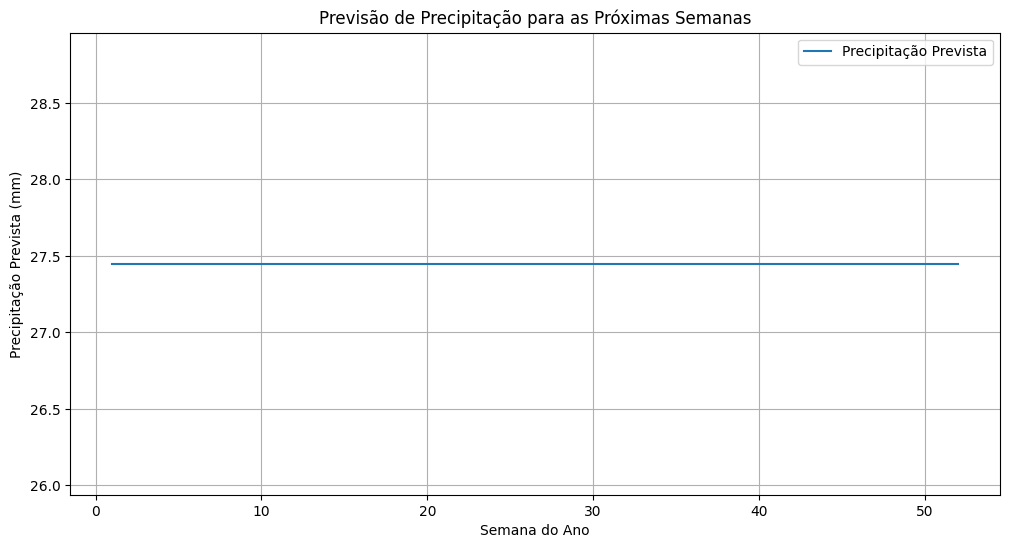

In [ ]:
colunas_explicativas = [
    "radiacao_global",
    "pressao_atmosferica_max",
    "pressao_atmosferica_min",
    "umidade_rel_ar",
    "umidade_rel_max",
    "umidade_rel_min"
]

X_historico = dados[colunas_explicativas]
y_historico = dados["precipitacao"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_historico_scaled = scaler.fit_transform(X_historico)

from sklearn.linear_model import Ridge
modelo_ridge = Ridge(alpha=0.001)
modelo_ridge.fit(X_historico_scaled, y_historico)

dados_futuros = pd.DataFrame({
    "ano": [2024] * 52,
    "semana_no_ano": list(range(1, 53)),
    "radiacao_global": np.mean(dados["radiacao_global"]) * np.ones(52),
    "pressao_atmosferica_max": np.mean(dados["pressao_atmosferica_max"]) * np.ones(52),
    "pressao_atmosferica_min": np.mean(dados["pressao_atmosferica_min"]) * np.ones(52),
    "umidade_rel_ar": np.mean(dados["umidade_rel_ar"]) * np.ones(52),
    "umidade_rel_max": np.mean(dados["umidade_rel_max"]) * np.ones(52),
    "umidade_rel_min": np.mean(dados["umidade_rel_min"]) * np.ones(52),
})

variaveis_explicativas = dados_futuros[colunas_explicativas]

X_futuro_scaled = scaler.transform(variaveis_explicativas)

y_futuro_pred = modelo_ridge.predict(X_futuro_scaled)

dados_futuros["precipitacao_prevista"] = y_futuro_pred

print(dados_futuros[["ano", "semana_no_ano", "precipitacao_prevista"]].head())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dados_futuros["semana_no_ano"], dados_futuros["precipitacao_prevista"], label="Precipitação Prevista")
plt.title("Previsão de Precipitação para as Próximas Semanas")
plt.xlabel("Semana do Ano")
plt.ylabel("Precipitação Prevista (mm)")
plt.grid(True)
plt.legend()
plt.show()


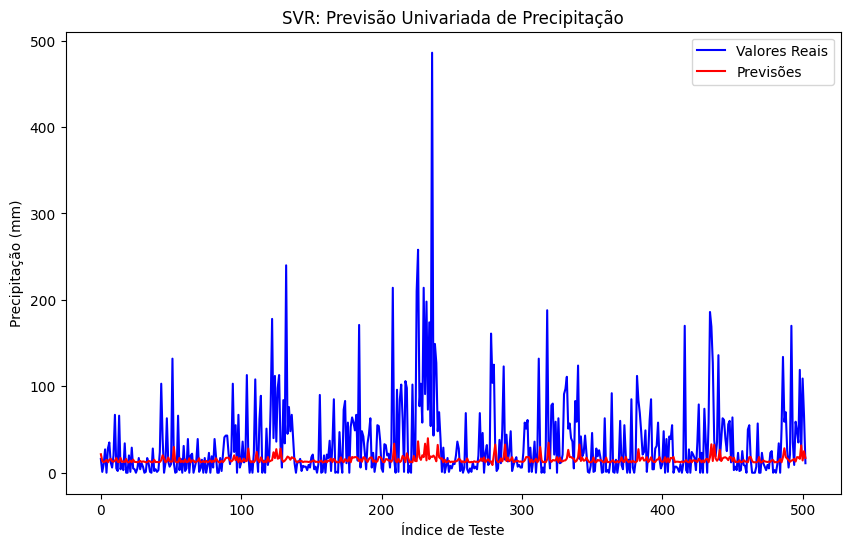

Mean Squared Error (MSE): 2499.2886513759872
Coeficiente de Determinação (R²): -0.14030138891954214


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lags = 1

X = []
y = []

for i in range(lags, len(dados)):
    X.append(dados['precipitacao'].iloc[i-lags:i].values)
    y.append(dados['precipitacao'].iloc[i])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.1, kernel='rbf')

svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Valores Reais')
plt.plot(y_pred, color='red', label='Previsões')
plt.xlabel('Índice de Teste')
plt.ylabel('Precipitação (mm)')
plt.title('SVR: Previsão Univariada de Precipitação')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")



    ano  semana  regiao_Caxias do Sul  regiao_Ijuí  regiao_Passo Fundo  \
0  2018       1                  18.0          4.0                42.0   
1  2018       2                  19.0         21.0                12.0   
2  2018       3                  71.0         40.0                95.0   
3  2018       4                  65.0         58.0               157.0   
4  2018       5                   0.0          0.0                 0.0   

   regiao_Pelotas  regiao_Porto Alegre  regiao_Santa Cruz do Sul - Lajeado  \
0            25.0                 45.0                                 4.0   
1            10.0                 37.0                                 0.0   
2            17.0                 43.0                                 6.0   
3            12.0                  9.0                                30.0   
4             0.0                  8.0                                 0.0   

   regiao_Santa Maria  regiao_Uruguaiana  
0                16.0               27.0  


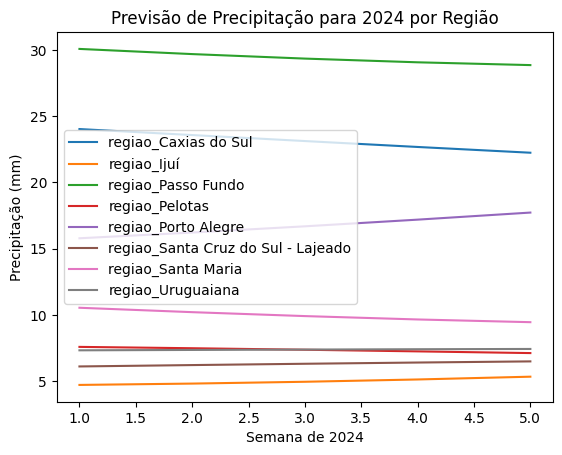

Previsões para regiao_Caxias do Sul em 2024: [24.02905662 23.57606764 23.12366238 22.67740737 22.24313768]
Previsões para regiao_Ijuí em 2024: [4.71624624 4.8173262  4.95428328 5.12762089 5.33769577]
Previsões para regiao_Passo Fundo em 2024: [30.07791518 29.68785607 29.34779289 29.06755933 28.85691459]
Previsões para regiao_Pelotas em 2024: [7.5873593  7.48544536 7.37159747 7.24854366 7.11986191]
Previsões para regiao_Porto Alegre em 2024: [15.78564071 16.21802042 16.68795314 17.19178832 17.72574687]
Previsões para regiao_Santa Cruz do Sul - Lajeado em 2024: [6.11055405 6.21416079 6.31327311 6.40631253 6.49224492]
Previsões para regiao_Santa Maria em 2024: [10.54076603 10.20838918  9.9115473   9.65710034  9.45214226]
Previsões para regiao_Uruguaiana em 2024: [7.32837923 7.35647346 7.38524988 7.41102487 7.43075356]


In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dados = pd.read_csv('df_semana.csv')

print(dados.head())

regioes = [col for col in dados.columns if 'regiao' in col]

previsoes_2024 = {}

for regiao in regioes:
    dados_regiao = dados[['ano', 'semana', regiao]].copy()
    X = dados_regiao[['ano', 'semana']].values
    y = dados_regiao[regiao].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    svr = SVR(C=10, epsilon=0.1, kernel='rbf')
    svr.fit(X_scaled, y)
    anos_futuros = np.array([2024] * 5)
    semanas_futuras = np.array([1, 2, 3, 4, 5])
    X_futuro = np.column_stack((anos_futuros, semanas_futuras))
    X_futuro_scaled = scaler.transform(X_futuro)
    precipitacao_2024 = svr.predict(X_futuro_scaled)
    previsoes_2024[regiao] = precipitacao_2024
    plt.plot(semanas_futuras, precipitacao_2024, label=regiao)

plt.xlabel('Semana de 2024')
plt.ylabel('Precipitação (mm)')
plt.title('Previsão de Precipitação para 2024 por Região')
plt.legend()
plt.grid(False)
plt.show()

for regiao, previsao in previsoes_2024.items():
    print(f"Previsões para {regiao} em 2024: {previsao}")

